In [66]:
# Load CSV using Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'LRC_dataset_016_Feature_Engineering.csv'
names = ['sample_no', 'current_a', 'voltage_v','position_deg','velocity_degs', 'setpoint_deg',
         'torqsens_nm', 'disturbance_nm', 'collision', 'current_a_dev', 'voltage_v_dev',
         'position_deg_dev', 'velocity_degs_dev', 'setpoint_deg_dev','torqsens_nm_dev',
         'disturbance_nm_dev','torq_diff_nm', 'curr_diff_a', 'volt_diff_v', 'pos_diff_deg', 'vel_diff_deg','setp_diff_deg']
df = pd.read_csv(filename, names=names)
#Negatives torque data flawed; remove it
ind_1 = df['disturbance_nm'] >= 0 
df = df[ind_1]
data = df
data[1:10]

,sample_no,current_a,voltage_v,position_deg,velocity_degs,setpoint_deg,torqsens_nm,disturbance_nm,collision,current_a_dev,...,velocity_degs_dev,setpoint_deg_dev,torqsens_nm_dev,disturbance_nm_dev,torq_diff_nm,curr_diff_a,volt_diff_v,pos_diff_deg,vel_diff_deg,setp_diff_deg
1,1.0,0.19001,11.981,-15.778,75.379,-120,0.79078,0.0,-1,-0.000793,...,0.113500,0,-0.012404,0.0,0.01234,0.00077,0.000,-0.755,-0.110,0
2,1.0,0.19079,11.981,-16.531,75.267,-120,0.85160,0.0,-1,-0.000011,...,0.001518,0,0.048416,0.0,0.06082,0.00078,0.000,-0.753,-0.112,0
3,1.0,0.19159,11.981,-17.283,75.153,-120,0.80301,0.0,-1,0.000782,...,-0.111980,0,-0.000174,0.0,-0.04859,0.00080,0.000,-0.752,-0.114,0
4,1.0,0.19239,11.981,-18.034,75.038,-120,0.79209,0.0,-1,0.001586,...,-0.226990,0,-0.011094,0.0,-0.01092,0.00080,0.000,-0.751,-0.115,0
5,2.0,0.19320,11.981,-18.784,74.922,-120,0.82992,0.0,-1,-0.001669,...,0.238810,0,-0.038575,0.0,0.03783,0.00081,0.000,-0.750,-0.116,0
6,2.0,0.19403,11.981,-19.532,74.804,-120,0.88061,0.0,-1,-0.000845,...,0.120850,0,0.012122,0.0,0.05069,0.00083,0.000,-0.748,-0.118,0
7,2.0,0.19486,11.981,-20.280,74.684,-120,0.86347,0.0,-1,-0.000010,...,0.001436,0,-0.005018,0.0,-0.01714,0.00083,0.000,-0.748,-0.120,0
8,2.0,0.19571,11.980,-21.026,74.564,-120,0.86352,0.0,-1,0.000835,...,-0.119410,0,-0.004974,0.0,0.00005,0.00085,-0.001,-0.746,-0.120,0
9,2.0,0.19656,11.980,-21.771,74.441,-120,0.90494,0.0,-1,0.001689,...,-0.241680,0,0.036445,0.0,0.04142,0.00085,0.000,-0.745,-0.123,0


In [67]:
#Balance the dataset. Assumes that majority is -1 collision (Which is true)

from sklearn.utils import resample

def data_downsampling(data):

    # Separate majority and minority classes
    data_majority = data[data.collision==-1]
    data_minority = data[data.collision==+1]


    majority_count = data_majority.shape[0]
    minority_count = data_minority.shape[0]

    # Downsample the majority class
    data_majority_downsampled = resample(data_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=minority_count,    # to match minority class
                                 random_state=123) # reproducible results

    new_majority_count = data_majority_downsampled.shape[0]
 
    # Combine the minority class with the downsampled majority class
    data_downsampled = pd.concat([data_minority, data_majority_downsampled])
    
    dataset_balance = float(new_majority_count) / data_downsampled.shape[0]

    print(dataset_balance)

    print(type(data_downsampled))

    data = data_downsampled

    return data

In [68]:
#Normalization - Scales the Data Appropriately
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [69]:
#convert the dataframe into useful arrays
def get_panda_data(dataframe, features, label):
    dataframe['constant'] = 1 #w0
    features = ['constant'] + features
    features_frame = dataframe[features]
    feature_matrix = features_frame.as_matrix()
    label_sarray = dataframe[label]
    label_array = label_sarray.as_matrix()
    return(feature_matrix, label_array)



In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

Initial Model Run - Model I

In [71]:
#Initial Model Run (In the Report as Model I)
data = df
features = ['current_a', 'voltage_v','position_deg','velocity_degs',
          'setpoint_deg','torqsens_nm']

label = 'collision'

data = data_downsampling(data)
data[features] = scaler.fit_transform(data[features])
[feature_matrix, labels] = get_panda_data(data, features, label)
x_train, x_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.20, random_state=0)
logisticRegr.fit(x_train, y_train)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(logisticRegr.coef_)
print(score)

0.5
<class 'pandas.core.frame.DataFrame'>
[[ 1.77795056 -6.04269727  3.00815611 -5.0866612   5.52212535  1.63974572
  -8.24394138]]
0.6765151515151515


(1320,)
(1320,)


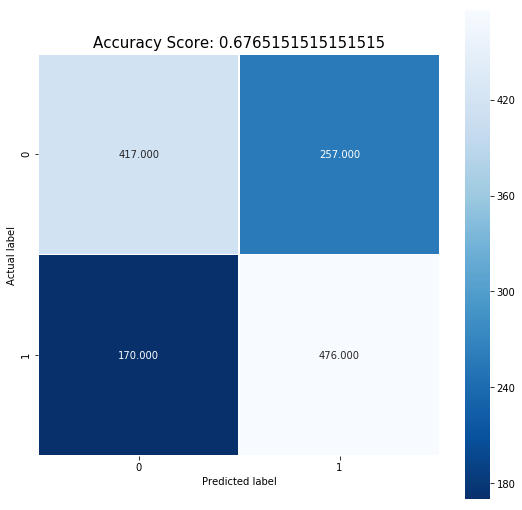

In [72]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

print(y_test.shape)
predictions = logisticRegr.predict(x_test)
print(predictions.shape)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Feature Removal Model - Model II

In [73]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

rfe = RFE(logisticRegr, 4)
rfe = rfe.fit(x_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)

from itertools import compress
features_rfe = ['constant'] + features
features_rfe = list(compress(features_rfe, rfe.support_))

[False  True False  True  True False  True]


In [74]:
data_rfe = data
data_rfe = data_downsampling(data_rfe)
[feature_matrix_rfe, labels_rfe] = get_panda_data(data_rfe, features_rfe, label)
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(feature_matrix_rfe, 
                                                                    labels_rfe, test_size=0.20, random_state=0)
logisticRegr.fit(x_train_rfe, y_train_rfe)
score = logisticRegr.score(x_test_rfe, y_test_rfe)
print(logisticRegr.coef_)
print(score)

0.5
<class 'pandas.core.frame.DataFrame'>
[[ 1.93039645 -5.33671012 -3.94452792  7.42544907 -7.86200461]]
0.6575757575757576


Feature Engineered Model - Model III

In [75]:
#Addition of Engineered Features
data_dev = df
data_dev = data_downsampling(data_dev)
features_scale = ['current_a', 'voltage_v','position_deg','velocity_degs', 'setpoint_deg',
         'torqsens_nm','curr_diff_a', 'volt_diff_v', 'pos_diff_deg',
                'vel_diff_deg','setp_diff_deg', 'torq_diff_nm']
data_dev[features_scale] = scaler.fit_transform(data_dev[features_scale])
features_dev = features_scale + ['disturbance_nm']
[feature_matrix_dev, labels_dev] = get_panda_data(data_dev, features_dev, label)
x_train_dev, x_test_dev, y_train_dev, y_test_dev = train_test_split(feature_matrix_dev,
                                                                    labels_dev, test_size=0.20, random_state=0)

0.5
<class 'pandas.core.frame.DataFrame'>


In [76]:
#drop disturbance_ref as a feature
x_train_dev_dist = x_train_dev[:,13]
x_test_dev_dist = x_test_dev[:,13]

x_train_dev = np.delete(x_train_dev,13,1)
x_test_dev = np.delete(x_test_dev,13,1)
x_train_dev.shape
x_train_dev_dist

array([0.7, 0. , 0. , ..., 0.1, 0.3, 0.5])

In [77]:
logisticRegr.fit(x_train_dev, y_train_dev)
score = logisticRegr.score(x_test_dev, y_test_dev)
score_x = logisticRegr.score(x_train_dev,y_train_dev)
print(score)
print(logisticRegr.coef_, features_dev)

0.9174242424242425
[[  2.99924364  -4.16906313   1.10742468  -3.45739975   3.76273899
    1.44559966  -4.28061965  21.66544991  -0.72281316  -2.76057764
   -9.78126082  -1.01470846 -15.39746186]] ['current_a', 'voltage_v', 'position_deg', 'velocity_degs', 'setpoint_deg', 'torqsens_nm', 'curr_diff_a', 'volt_diff_v', 'pos_diff_deg', 'vel_diff_deg', 'setp_diff_deg', 'torq_diff_nm', 'disturbance_nm']


(1320,)
(1320,)


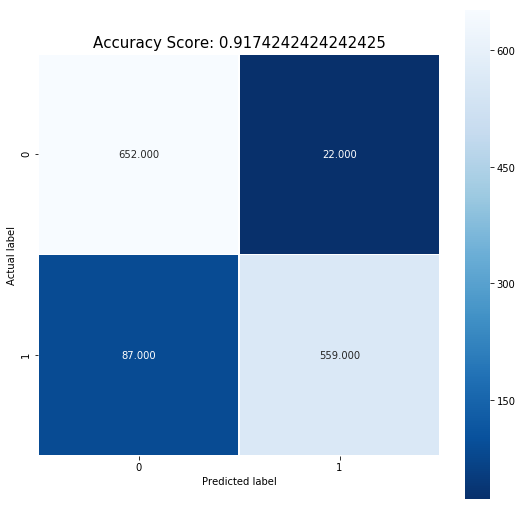

In [78]:
print(y_test_dev.shape)
predictions = logisticRegr.predict(x_test_dev)
print(predictions.shape)
cm1 = metrics.confusion_matrix(y_test_dev, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [81]:
score = logisticRegr.score(x_test_dev, y_test_dev)
score_x = logisticRegr.score(x_train_dev,y_train_dev)
print(score)
print(logisticRegr.coef_, features_dev)

0.9174242424242425
[[  2.99924364  -4.16906313   1.10742468  -3.45739975   3.76273899
    1.44559966  -4.28061965  21.66544991  -0.72281316  -2.76057764
   -9.78126082  -1.01470846 -15.39746186]] ['current_a', 'voltage_v', 'position_deg', 'velocity_degs', 'setpoint_deg', 'torqsens_nm', 'curr_diff_a', 'volt_diff_v', 'pos_diff_deg', 'vel_diff_deg', 'setp_diff_deg', 'torq_diff_nm', 'disturbance_nm']


In [82]:
#Check Model III accuracy wst the torque magnitude
ind_torq = x_test_dev_dist == 0.3
torq_x_test = x_test_dev[ind_torq]
torq_y_test = y_test_dev[ind_torq]
score_torq = logisticRegr.score(torq_x_test,torq_y_test)
print(score_torq)

1.0
